### Decision Tree Analysis

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix

In [49]:
data = pd.read_csv('Airline_Delay_Cause.csv')

In [50]:
data.shape

(171666, 21)

In [51]:
top_6_airlines = ['DL', 'AA', 'UA', 'WN', 'AS', 'B6']
holiday_months = [12, 7, 8]
delay_reasons = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']
features = ['arr_flights', 'carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct', 'month', 'year']

Group 1 Default Training Accuracy : 0.7407246691256237
Group 1 Default Testing Accuracy : 0.7393693954295633


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Group 1 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 7}
Group 1 Optimized Training Accuracy : 0.9466984884645983
Group 1 Optimized Testing Accuracy : 0.9262366213479896


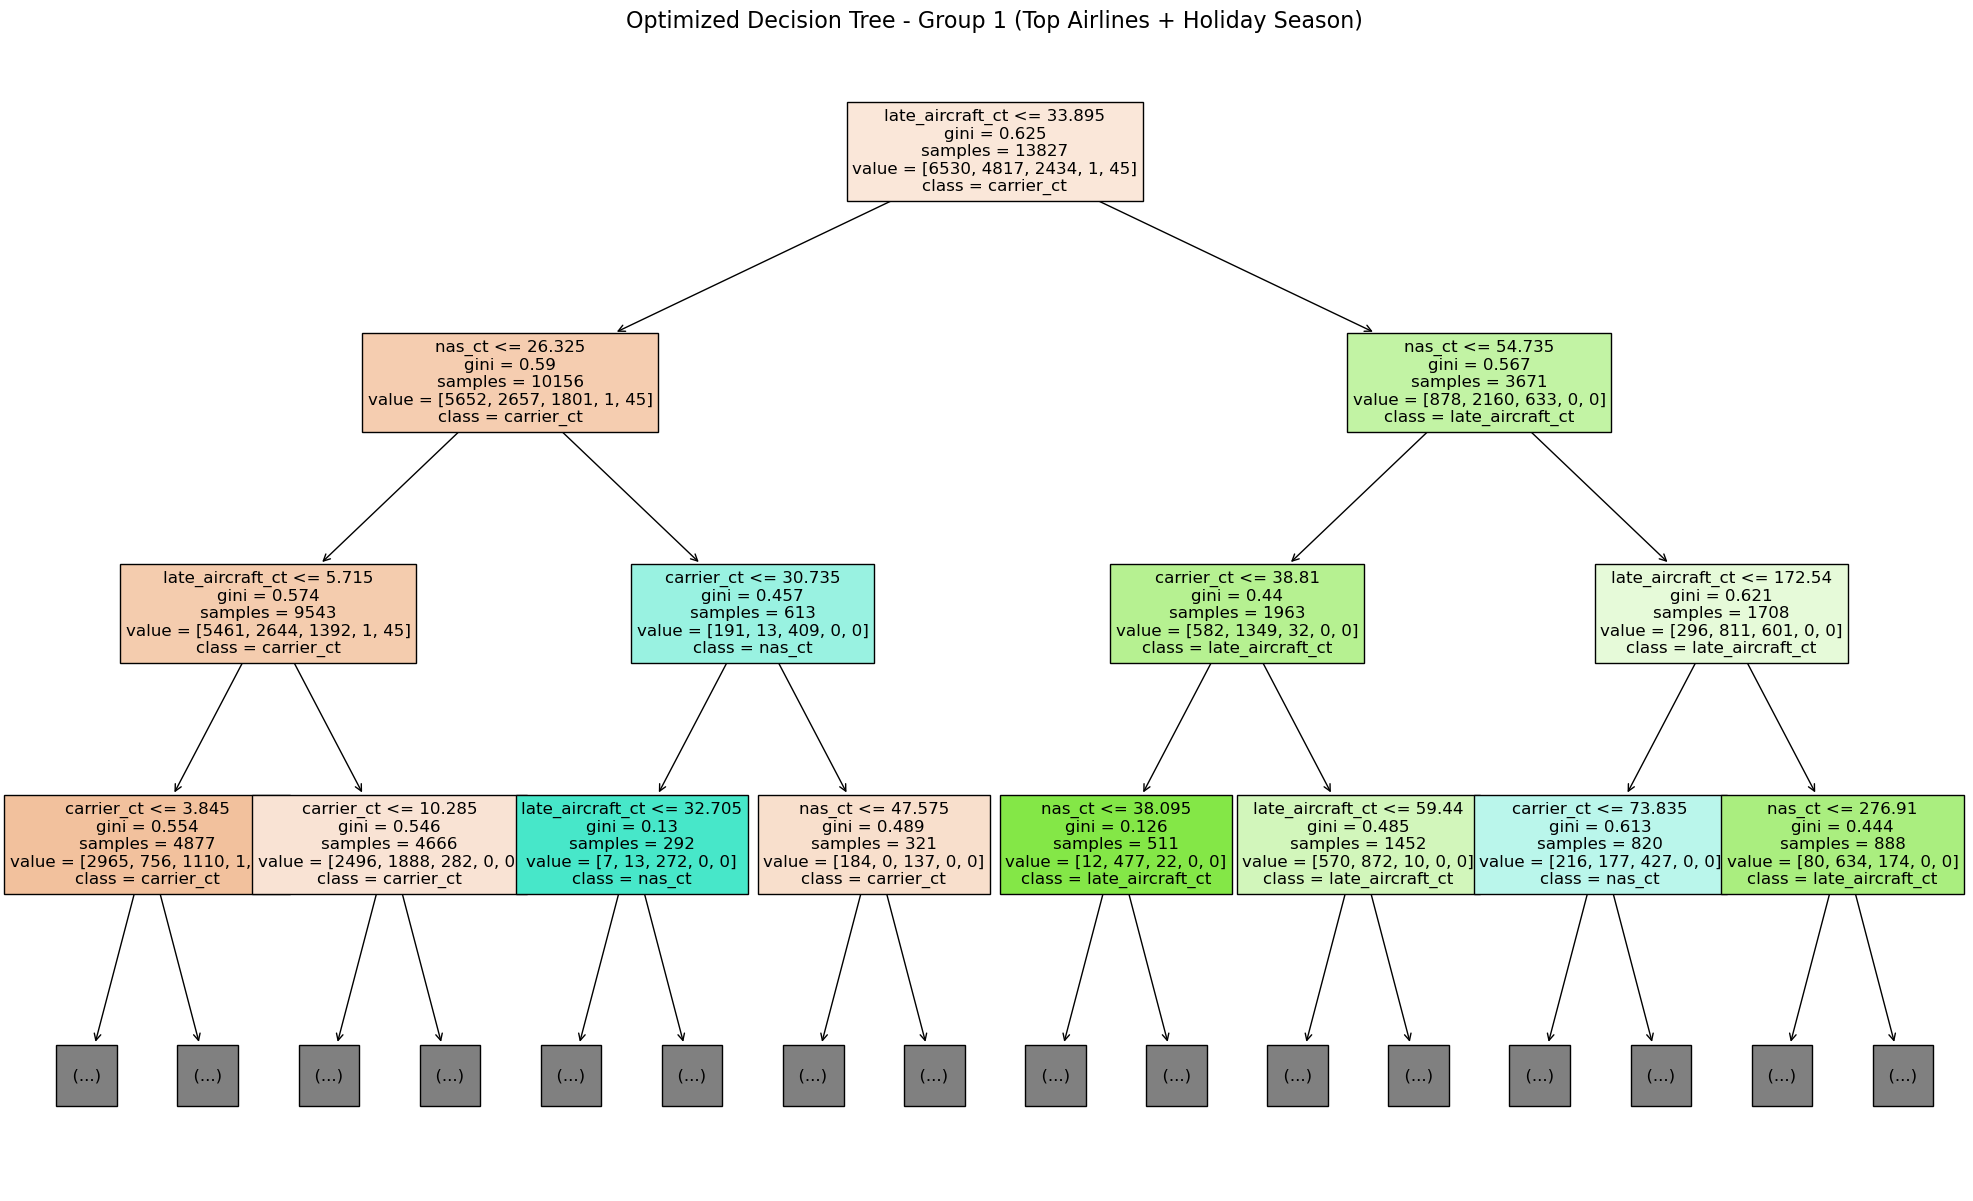

In [52]:
# Group 1: Top Airlines + Holiday Season
group1_data = data[
    (data['carrier'].isin(top_6_airlines)) & 
    (data['month'].isin(holiday_months))
].copy()

 
group1_data['main_delay_reason'] = group1_data[delay_reasons].fillna(0).idxmax(axis=1)

 
X1 = group1_data[features]
y1 = group1_data['main_delay_reason']
le1 = LabelEncoder()
y1_encoded = le1.fit_transform(y1)

 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1_encoded, test_size=0.2, random_state=11)

 
default_tree1 = DecisionTreeClassifier(max_depth=5, min_samples_split=3, random_state=11)
default_tree1.fit(X1_train, y1_train)
default_train_acc1 = default_tree1.score(X1_train, y1_train)
default_test_acc1 = default_tree1.score(X1_test, y1_test)

print("Group 1 Default Training Accuracy :", default_train_acc1)
print("Group 1 Default Testing Accuracy :", default_test_acc1)


param_grid1 = {
    'max_depth': [1,2,3,4,5,6,7,8,9,10],
    'min_samples_leaf': [1, 2, 4, 7, 10 ,20]
}
grid_search1 = GridSearchCV(DecisionTreeClassifier(random_state=11), param_grid1, cv=3, scoring='accuracy')
grid_search1.fit(X1_train, y1_train)

final_tree1 = DecisionTreeClassifier(**grid_search1.best_params_, random_state=11)
final_tree1.fit(X1_train, y1_train)
final_train_acc1 = final_tree1.score(X1_train, y1_train)
final_test_acc1 = final_tree1.score(X1_test, y1_test)

print("Group 1 Best Parameters:", grid_search1.best_params_)
print("Group 1 Optimized Training Accuracy :", final_train_acc1)
print("Group 1 Optimized Testing Accuracy :", final_test_acc1)

plt.figure(figsize=(25, 15))
plot_tree(
    final_tree1, 
    feature_names=features, 
    class_names=le1.classes_, 
    filled=True, 
    fontsize=12, 
    max_depth=3
)
plt.title("Optimized Decision Tree - Group 1 (Top Airlines + Holiday Season)", fontsize=16)
plt.show()



Group 2 Default Training Accuracy : 0.8488409323770492
Group 2 Default Testing Accuracy : 0.8465134148684126
Group 2 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 5}
Group 2 Optimized Training Accuracy : 0.8980052510245902
Group 2 Optimized Testing Accuracy : 0.8879426266248319


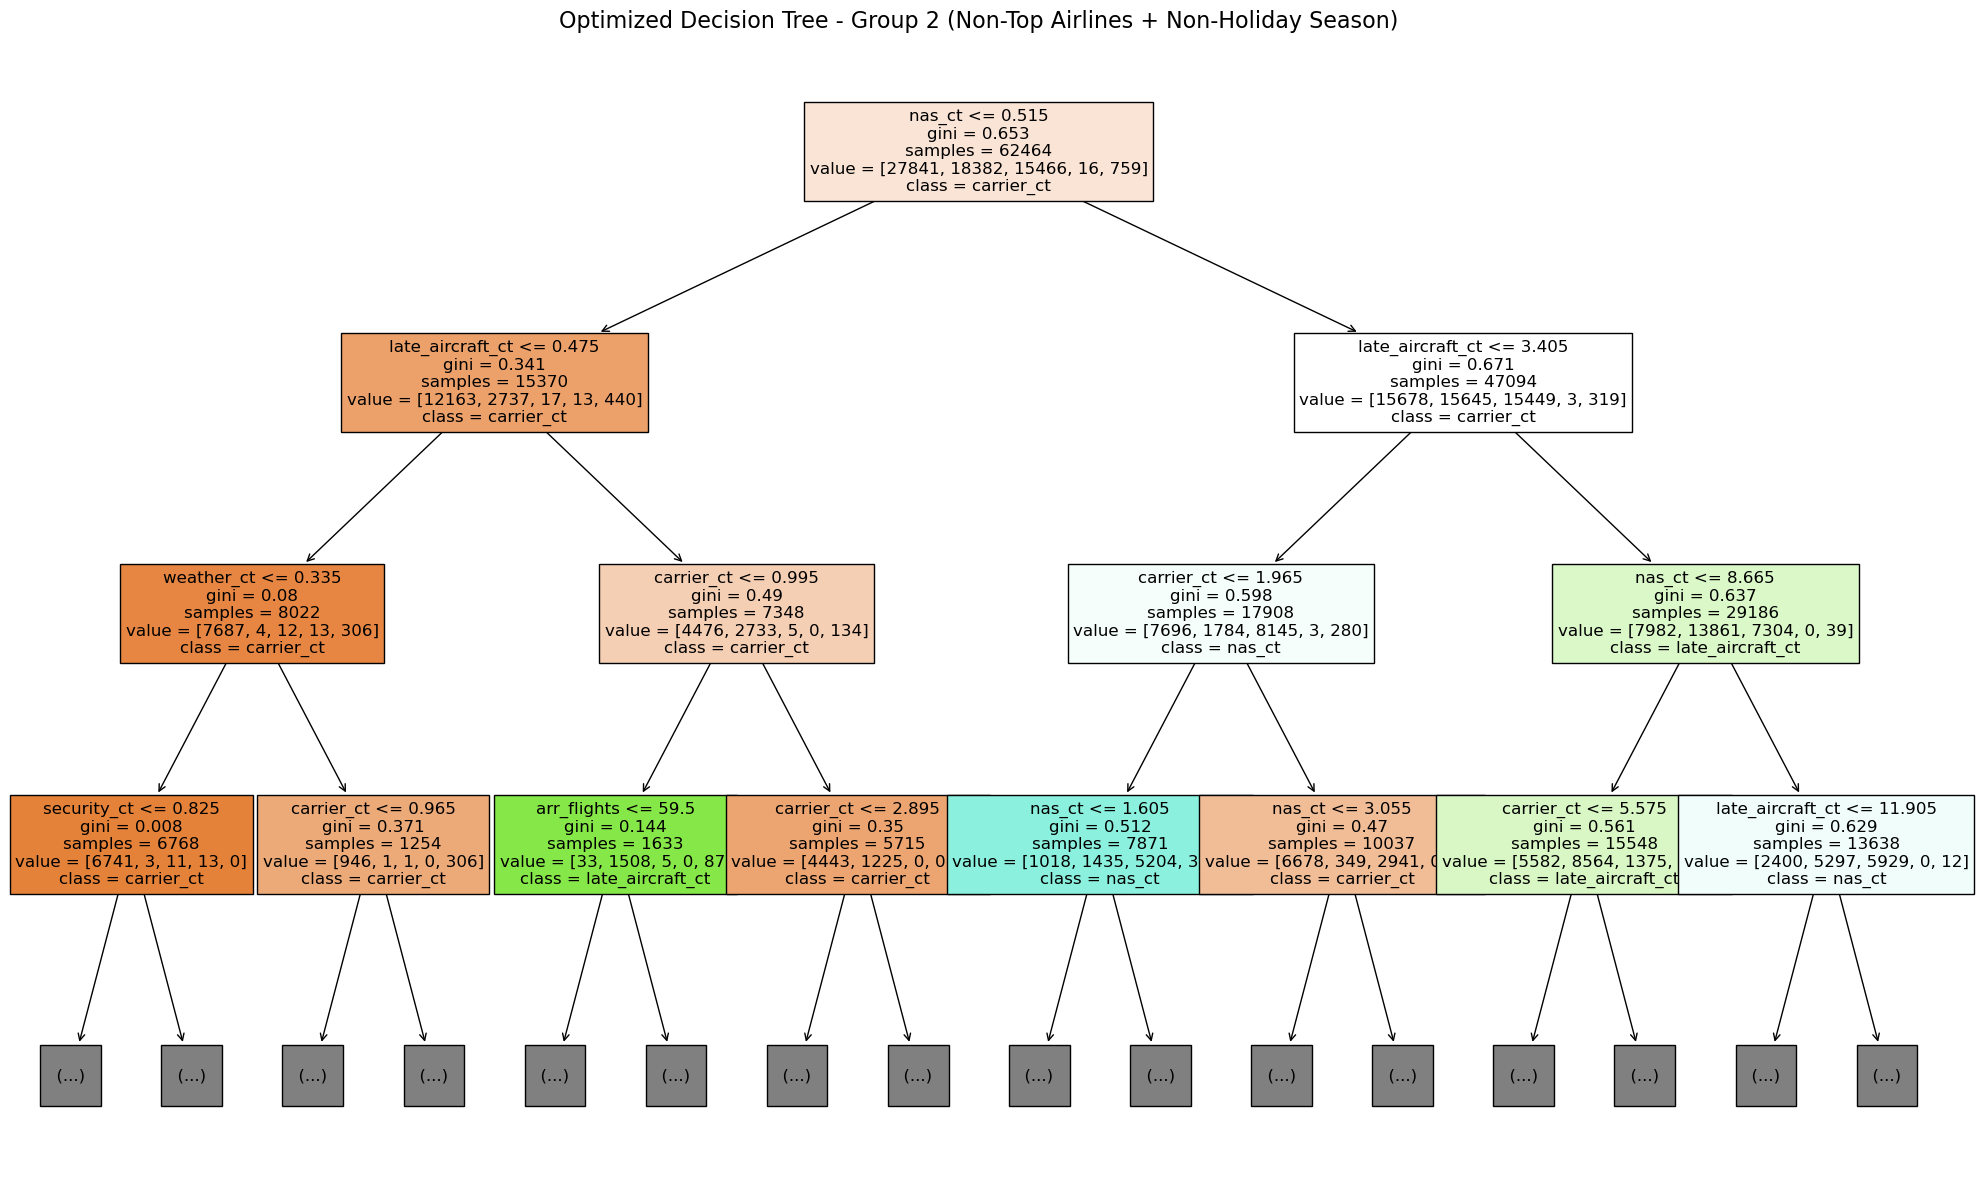

In [53]:
# Group 2: Non-Top Airlines + Non-Holiday Season
group2_data = data[
    (~data['carrier'].isin(top_6_airlines)) & 
    (~data['month'].isin(holiday_months))
].copy()

group2_data['main_delay_reason'] = group2_data[delay_reasons].fillna(0).idxmax(axis=1)

X2 = group2_data[features]
y2 = group2_data['main_delay_reason']
le2 = LabelEncoder()
y2_encoded = le2.fit_transform(y2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2_encoded, test_size=0.2, random_state=11)

default_tree2 = DecisionTreeClassifier(max_depth=6, min_samples_split=5, random_state=11)
default_tree2.fit(X2_train, y2_train)
default_train_acc2 = default_tree2.score(X2_train, y2_train)
default_test_acc2 = default_tree2.score(X2_test, y2_test)

print("Group 2 Default Training Accuracy :", default_train_acc2)
print("Group 2 Default Testing Accuracy :", default_test_acc2)

param_grid2 = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 3, 5, 7, 10]
}
grid_search2 = GridSearchCV(DecisionTreeClassifier(random_state=11), param_grid2, cv=3, scoring='accuracy')
grid_search2.fit(X2_train, y2_train)

final_tree2 = DecisionTreeClassifier(**grid_search2.best_params_, random_state=11)
final_tree2.fit(X2_train, y2_train)
final_train_acc2 = final_tree2.score(X2_train, y2_train)
final_test_acc2 = final_tree2.score(X2_test, y2_test)

print("Group 2 Best Parameters:", grid_search2.best_params_)
print("Group 2 Optimized Training Accuracy :", final_train_acc2)
print("Group 2 Optimized Testing Accuracy :", final_test_acc2)

plt.figure(figsize=(25, 15))
plot_tree(
    final_tree2, 
    feature_names=features, 
    class_names=le2.classes_, 
    filled=True, 
    fontsize=12, 
    max_depth=3
)
plt.title("Optimized Decision Tree - Group 2 (Non-Top Airlines + Non-Holiday Season)", fontsize=16)
plt.show()



Group 3 Default Training Accuracy : 0.7407220526275954
Group 3 Default Testing Accuracy : 0.7388496468213925
Group 3 Best Parameters: {'max_depth': 9, 'min_samples_leaf': 10}
Group 3 Optimized Training Accuracy : 0.9129096551202159
Group 3 Optimized Testing Accuracy : 0.9048435923309788


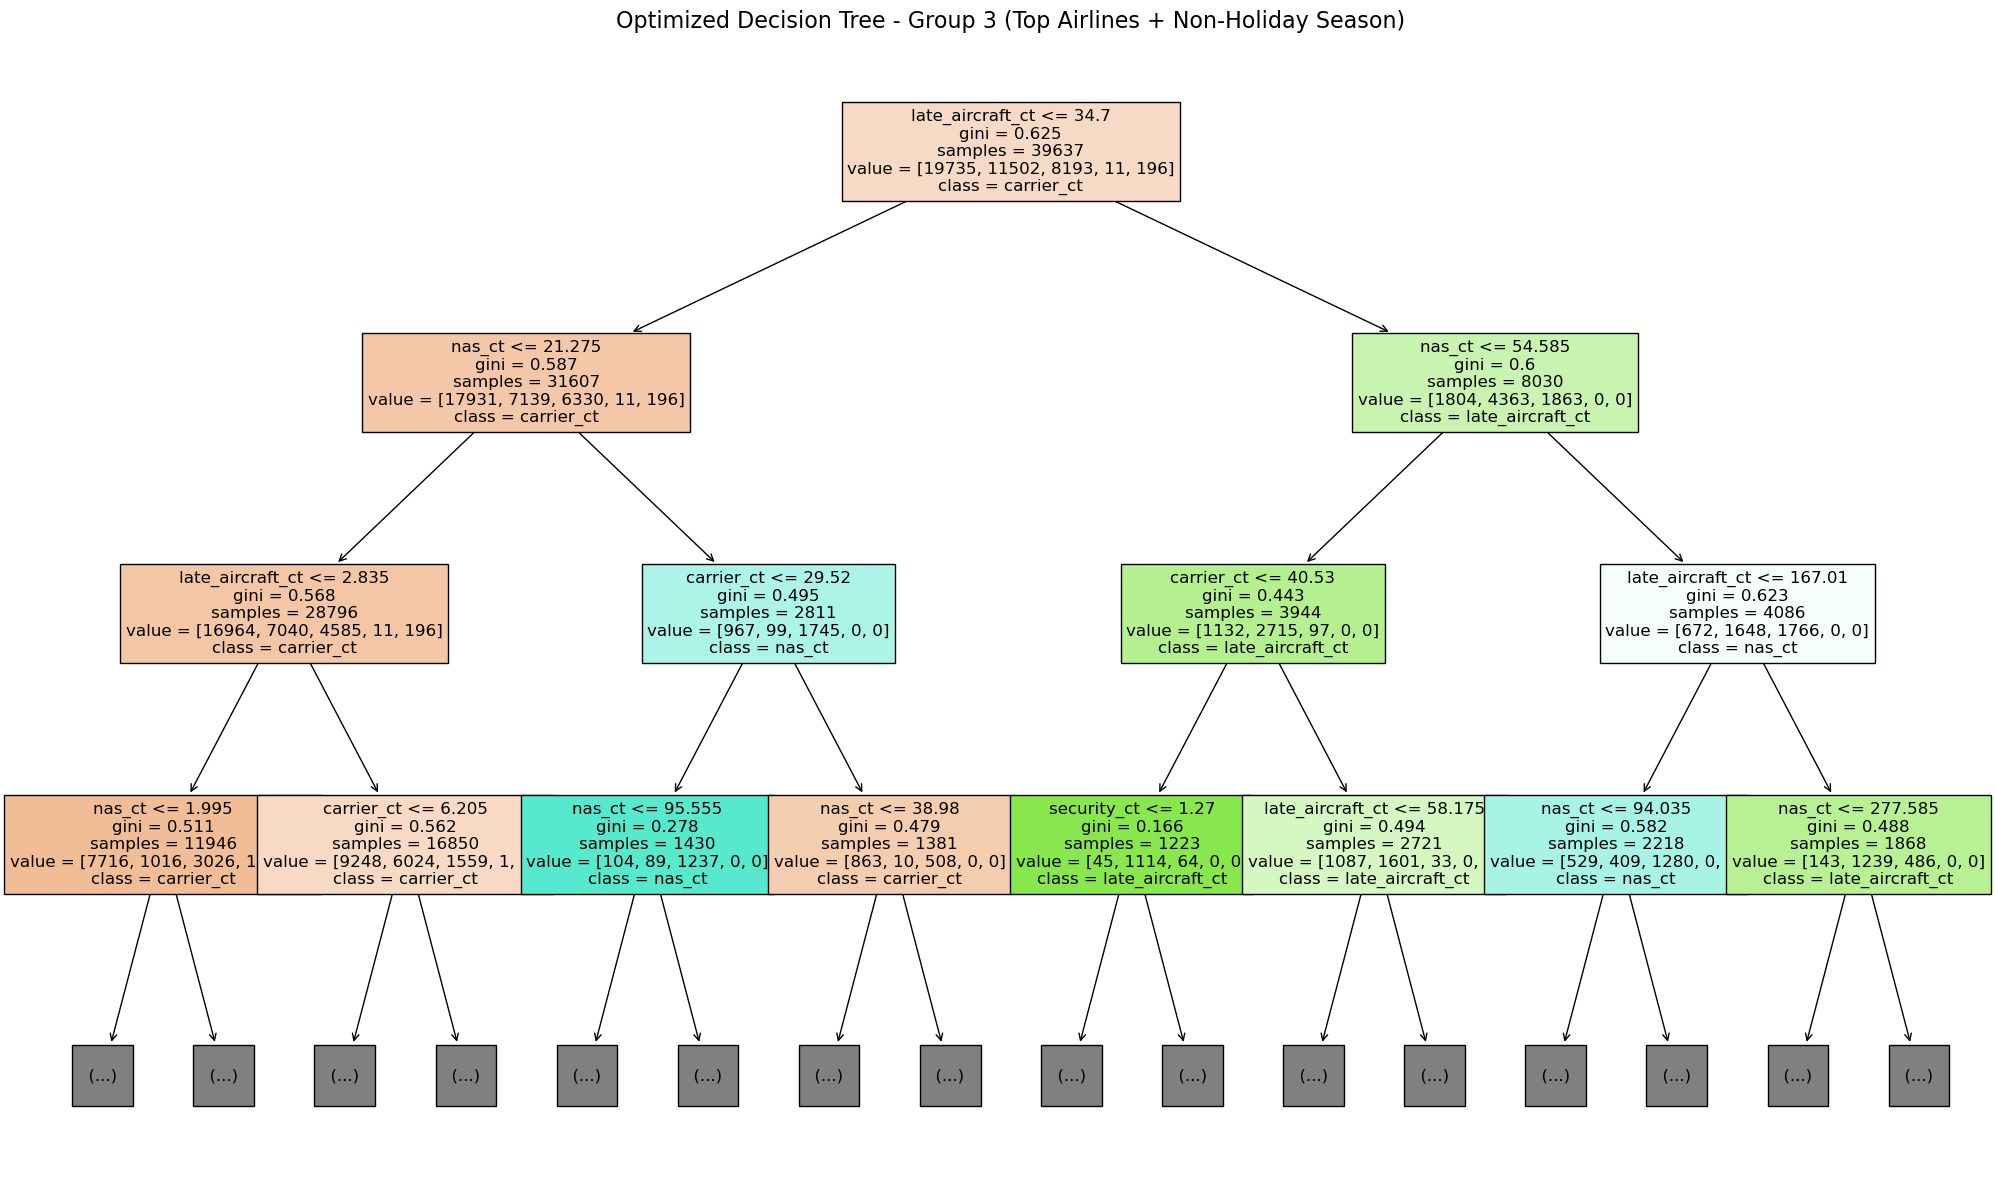

In [54]:
# Group 3: Top Airlines + Non-Holiday Season
group3_data = data[
    (data['carrier'].isin(top_6_airlines)) & 
    (~data['month'].isin(holiday_months))
].copy()

group3_data['main_delay_reason'] = group3_data[delay_reasons].fillna(0).idxmax(axis=1)

X3 = group3_data[features]
y3 = group3_data['main_delay_reason']
le3 = LabelEncoder()
y3_encoded = le3.fit_transform(y3)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3_encoded, test_size=0.2, random_state=11)

# Default Decision Tree
default_tree3 = DecisionTreeClassifier(max_depth=5, min_samples_split=4, random_state=11)
default_tree3.fit(X3_train, y3_train)

# Default Tree Accuracy
default_train_acc3 = default_tree3.score(X3_train, y3_train)
default_test_acc3 = default_tree3.score(X3_test, y3_test)

# Print Default Tree Results
print("Group 3 Default Training Accuracy :", default_train_acc3)
print("Group 3 Default Testing Accuracy :", default_test_acc3)

# Hyperparameter Tuning
param_grid3 = {
    'max_depth': [1, 3, 5, 7, 9],
    'min_samples_leaf': [1, 2, 3, 5, 10]
}
grid_search3 = GridSearchCV(DecisionTreeClassifier(random_state=11), param_grid3, cv=3, scoring='accuracy')
grid_search3.fit(X3_train, y3_train)

# Train Final Model (After Hyperparameter Tuning)
final_tree3 = DecisionTreeClassifier(**grid_search3.best_params_, random_state=11)
final_tree3.fit(X3_train, y3_train)

# Compute Training and Testing Accuracies for Optimized Model
final_train_acc3 = final_tree3.score(X3_train, y3_train)
final_test_acc3 = final_tree3.score(X3_test, y3_test)

# Print Results
print("Group 3 Best Parameters:", grid_search3.best_params_)
print("Group 3 Optimized Training Accuracy :", final_train_acc3)
print("Group 3 Optimized Testing Accuracy :", final_test_acc3)

# Visualize Optimized Decision Tree
plt.figure(figsize=(25, 15))
plot_tree(
    final_tree3, 
    feature_names=features, 
    class_names=le3.classes_, 
    filled=True, 
    fontsize=12, 
    max_depth=3
)
plt.title("Optimized Decision Tree - Group 3 (Top Airlines + Non-Holiday Season)", fontsize=16)
plt.show()


Group 4 Default Training Accuracy : 0.7462972480493388
Group 4 Default Testing Accuracy : 0.7379928985236405
Group 4 Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1}
Group 4 Optimized Training Accuracy : 0.926645797318133
Group 4 Optimized Testing Accuracy : 0.9076808073257335


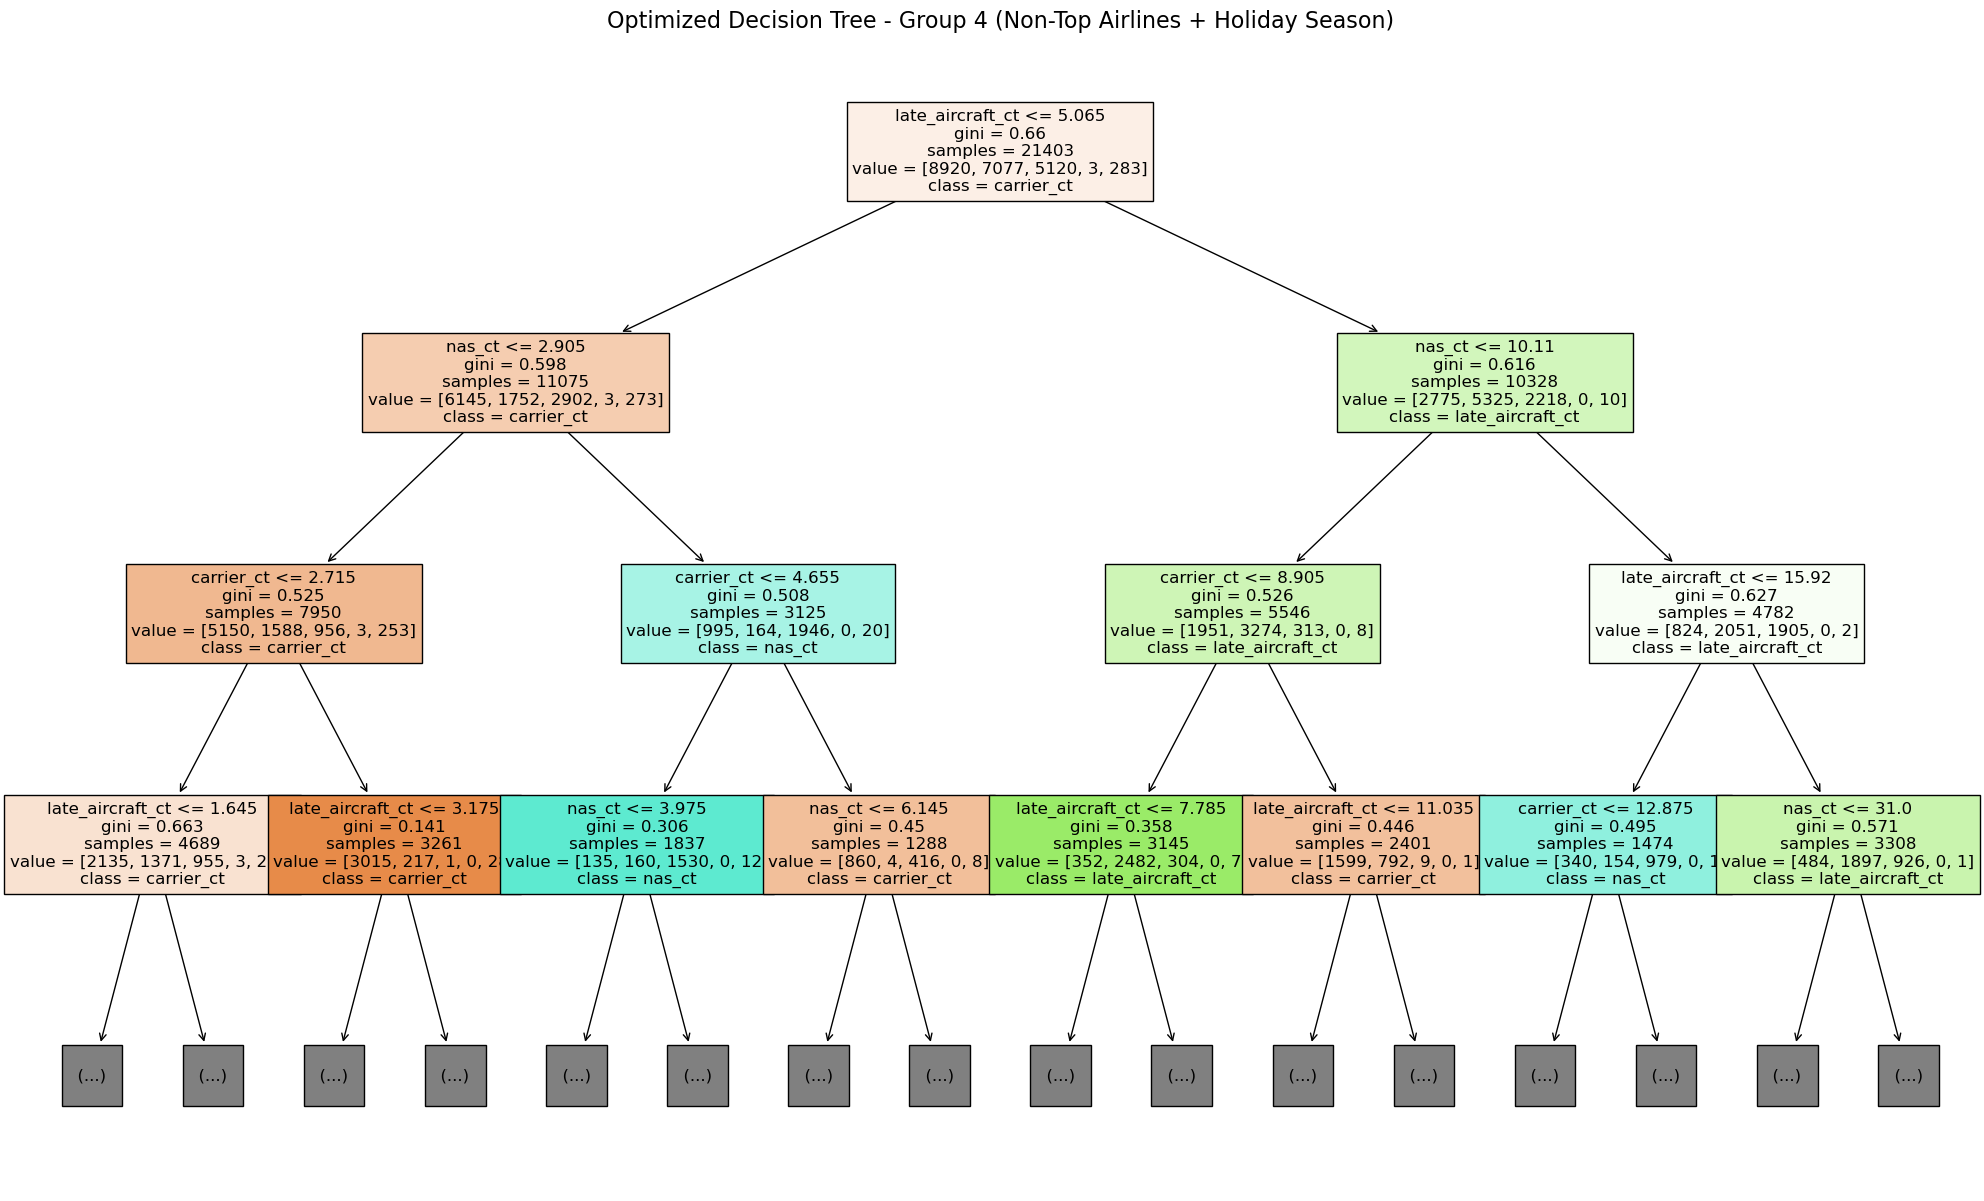

In [55]:
# Group 4: Non-Top Airlines + Holiday Season
group4_data = data[
    (~data['carrier'].isin(top_6_airlines)) & 
    (data['month'].isin(holiday_months))
].copy()

# Handle NaN values before using idxmax
group4_data['main_delay_reason'] = group4_data[delay_reasons].fillna(0).idxmax(axis=1)

# Features and Target for Group 4
X4 = group4_data[features]
y4 = group4_data['main_delay_reason']
le4 = LabelEncoder()
y4_encoded = le4.fit_transform(y4)

# Train-Test Split for Group 4
X4_train, X4_test, y4_train, y4_test = train_test_split(X4, y4_encoded, test_size=0.2, random_state=11)

# Default Decision Tree
default_tree4 = DecisionTreeClassifier(max_depth=4, min_samples_split=3, random_state=11)
default_tree4.fit(X4_train, y4_train)

# Default Tree Accuracy
default_train_acc4 = default_tree4.score(X4_train, y4_train)
default_test_acc4 = default_tree4.score(X4_test, y4_test)

# Print Default Tree Results
print("Group 4 Default Training Accuracy :", default_train_acc4)
print("Group 4 Default Testing Accuracy :", default_test_acc4)

# Hyperparameter Tuning
param_grid4 = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [1, 3, 5, 7, 10]
}
grid_search4 = GridSearchCV(DecisionTreeClassifier(random_state=11), param_grid4, cv=3, scoring='accuracy')
grid_search4.fit(X4_train, y4_train)

# Train Final Model (After Hyperparameter Tuning)
final_tree4 = DecisionTreeClassifier(**grid_search4.best_params_, random_state=11)
final_tree4.fit(X4_train, y4_train)

# Compute Training and Testing Accuracies for Optimized Model
final_train_acc4 = final_tree4.score(X4_train, y4_train)
final_test_acc4 = final_tree4.score(X4_test, y4_test)

# Print Results
print("Group 4 Best Parameters:", grid_search4.best_params_)
print("Group 4 Optimized Training Accuracy :", final_train_acc4)
print("Group 4 Optimized Testing Accuracy :", final_test_acc4)

# Visualize Optimized Decision Tree
plt.figure(figsize=(25, 15))
plot_tree(
    final_tree4, 
    feature_names=features, 
    class_names=le4.classes_, 
    filled=True, 
    fontsize=12, 
    max_depth=3
)
plt.title("Optimized Decision Tree - Group 4 (Non-Top Airlines + Holiday Season)", fontsize=16)
plt.show()
